Importing different libraries below so that I can perform cleaning and feature selection.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import requests
import pandas as pd
# Replace this URL with the actual raw file URL from GitHub
url = 'https://raw.githubusercontent.com/Saisuraj999/SaiSuraj_DSMT_002241214/main/AB_NYC_2019.csv'
response = requests.get(url)
if response.status_code == 200:
    with open('AB_NYC_2019.csv', 'wb') as file:
        file.write(response.content)
    # Now read the CSV file
    df = pd.read_csv('AB_NYC_2019.csv')
    # Display the first few rows of the dataframe
    print (df.head())
else:
    print("Failed to download the file. Status code:", response.status_code)
df.tail()

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Displaying the first 5 rows of a DataFrame

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Displaying the last 5 rows of a DataFrame

In [4]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Dataset Describe

In [22]:

df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Checking Unique Values for each variable.

In [23]:

df.nunique()

name                              47906
host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From above info we get to know that out of 10 variables in dataset 7 are int type and 3 are float type

id, host_id, price, minimum_nights, number_of_reviews, calculates_host_listings_count, availability_365 are integer variable
but latitude, longitude, reviews_per_month are float type.

counting the number of missing values (NaN or null values) in each column of a DataFrame.

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Dataset Columns

In [7]:

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Checking Unique Values for each variable.

In [9]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [10]:
# Data Wrangling

# Dropping id, host_name, last_review columns as they are unnecessary and will not impact our analysis and dataset
df.drop(['id','host_name','last_review'], axis=1, inplace=True)


# Filling null entries in name column with 'Unknown'
df['name'].fillna('Unknown', inplace=True)


# Filling null entries of reviews_per_month column with mean of all the other values of that column
mean_reviews_per_month = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)


# Checking null entries after filling Null values
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

From above we come to know there is no null values in the above dataset.

Likely Distributions of Numeric Variables:

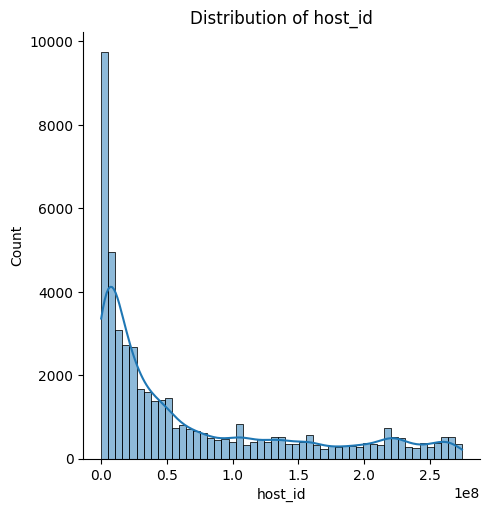

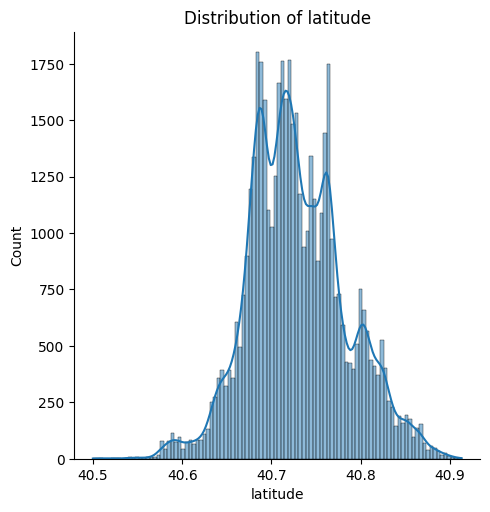

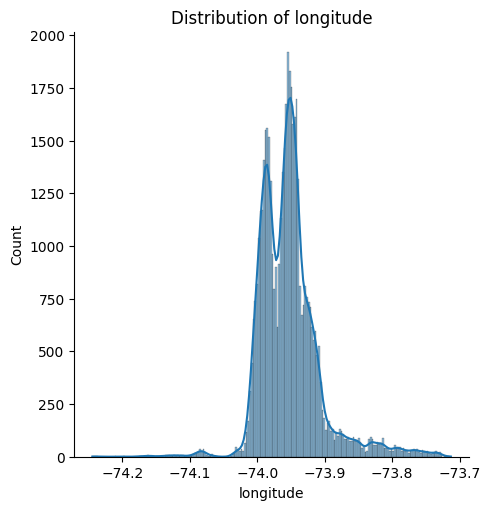

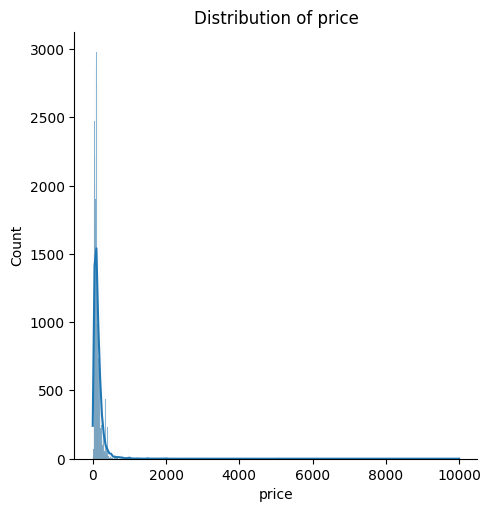

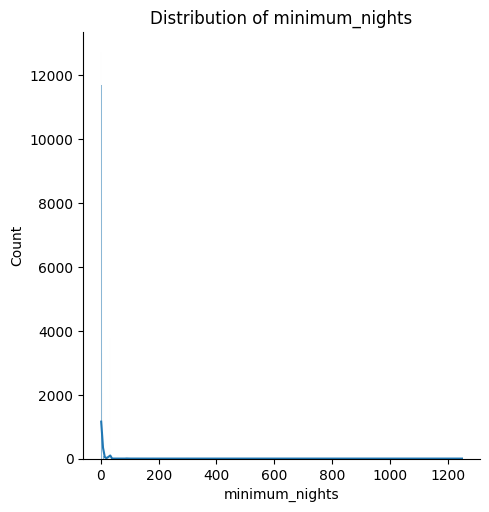

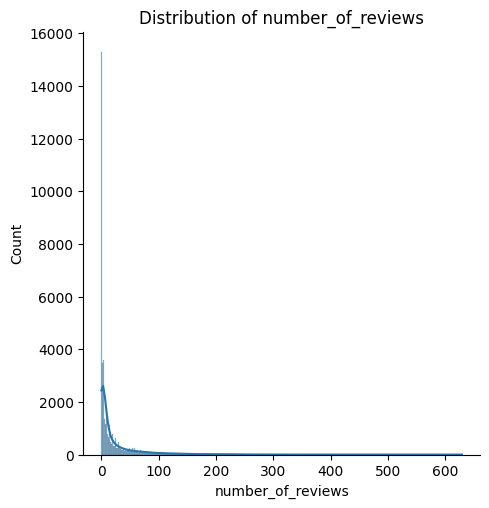

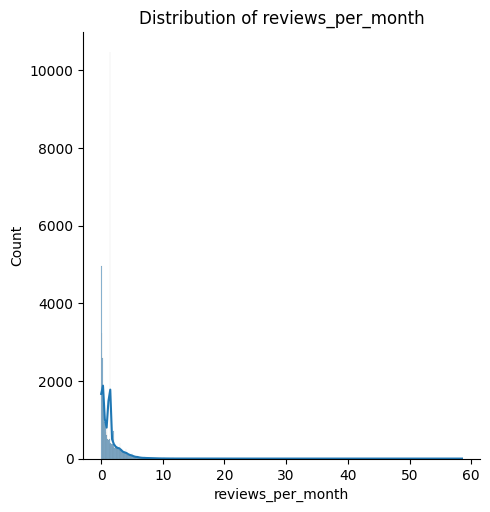

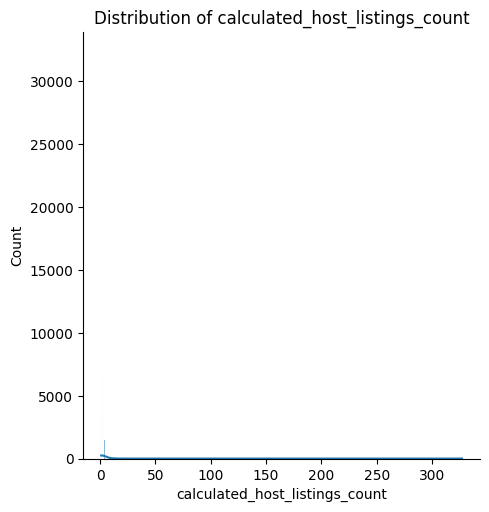

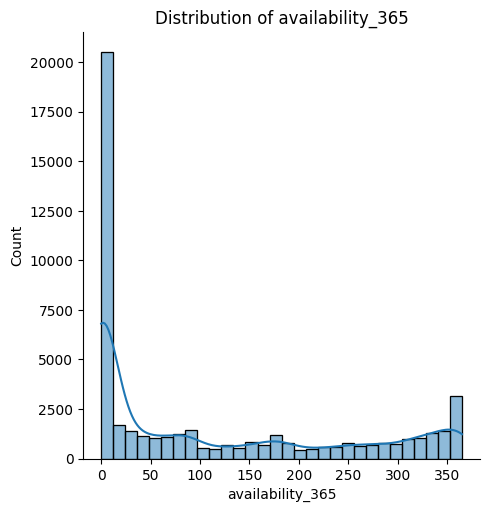

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot distributions
for col in numeric_columns:
    sns.displot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


Correlation Matrix:

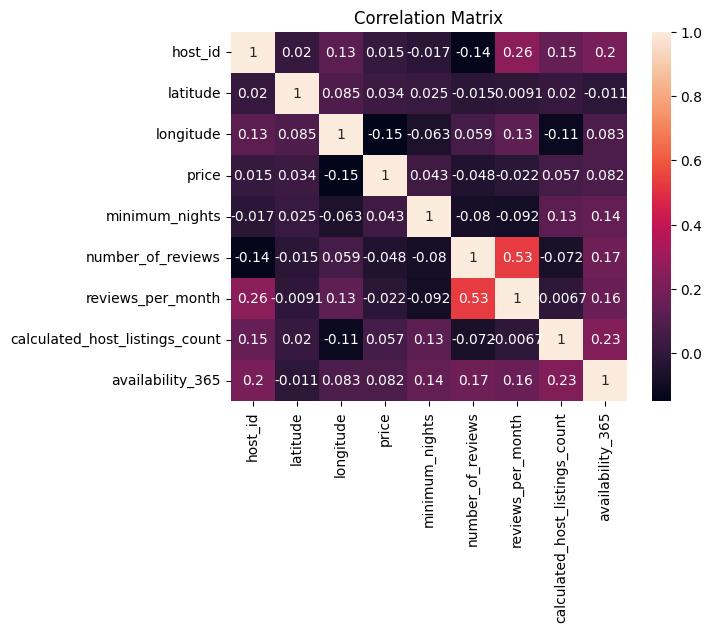

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


Feature Importance using Random Forest:

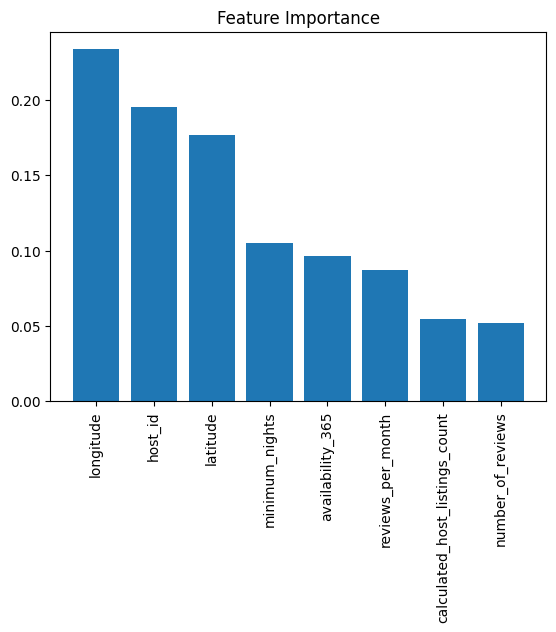

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Preprocessing: Drop rows with missing target, separate target from predictors
df.dropna(axis=0, subset=['price'], inplace=True)
y = df.price
X = df.drop(['price'], axis=1)

# Select only numeric features for simplicity
X = X.select_dtypes(exclude=['object'])

# Splitting data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.show()


 Recursive Feature Elimination (RFE):

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define model
model = LinearRegression()

# Selecting 5 most important features
rfe = RFE(model,n_features_to_select=5)
fit = rfe.fit(X_train, y_train)

# Summarize selected features
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 5
Selected Features: [False  True  True False  True  True False  True]
Feature Ranking: [4 1 1 2 1 1 3 1]


Independent Variables with Missing Data:

In [15]:
# Independent Variables with Missing Data
missing_data = df.isnull().sum()
missing_data[missing_data > 0]


Series([], dtype: int64)

Training and Test Sets Comparison:

In [16]:
# Assuming you've already split the data into training and test sets (X_train, X_test)
# Compare the mean and standard deviation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_stats = X_train.describe()
test_stats = X_test.describe()

print("Training Set Statistics:\n", train_stats)
print("\nTest Set Statistics:\n", test_stats)


Training Set Statistics:
             host_id      latitude     longitude  minimum_nights  \
count  3.911600e+04  39116.000000  39116.000000    39116.000000   
mean   6.759356e+07     40.728927    -73.952311        7.144775   
std    7.867092e+07      0.054555      0.046029       21.472973   
min    2.438000e+03     40.499790    -74.242850        1.000000   
25%    7.812758e+06     40.690067    -73.983080        1.000000   
50%    3.059831e+07     40.723035    -73.955750        3.000000   
75%    1.074344e+08     40.763180    -73.936498        5.000000   
max    2.743213e+08     40.913060    -73.712990     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       39116.000000       39116.000000                    39116.000000   
mean           23.334978           1.378949                        7.188925   
std            44.499352           1.503512                       33.172629   
min             0.000000           0.010000           

Independence of Predictor Variables (Multicollinearity Check):

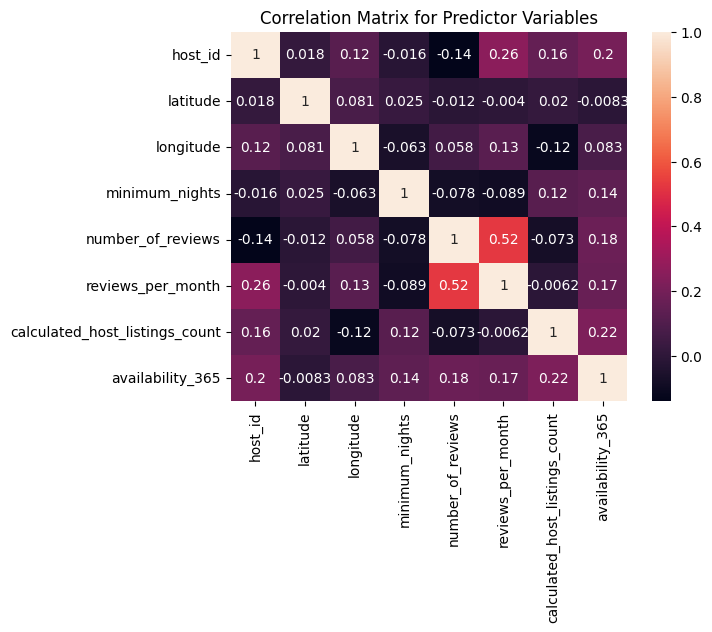

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for multicollinearity
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Predictor Variables")
plt.show()


Ranges of Predictor Variables:

In [18]:
# Checking the ranges of predictor variables
print(X_train.describe())


            host_id      latitude     longitude  minimum_nights  \
count  3.911600e+04  39116.000000  39116.000000    39116.000000   
mean   6.759356e+07     40.728927    -73.952311        7.144775   
std    7.867092e+07      0.054555      0.046029       21.472973   
min    2.438000e+03     40.499790    -74.242850        1.000000   
25%    7.812758e+06     40.690067    -73.983080        1.000000   
50%    3.059831e+07     40.723035    -73.955750        3.000000   
75%    1.074344e+08     40.763180    -73.936498        5.000000   
max    2.743213e+08     40.913060    -73.712990     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       39116.000000       39116.000000                    39116.000000   
mean           23.334978           1.378949                        7.188925   
std            44.499352           1.503512                       33.172629   
min             0.000000           0.010000                        1.000000   
2

Distributions of Predictor Variables:

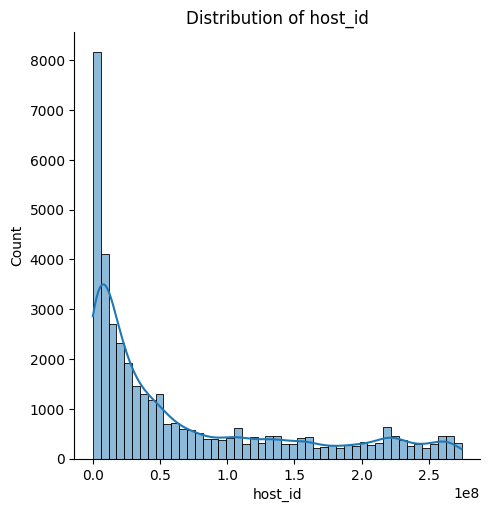

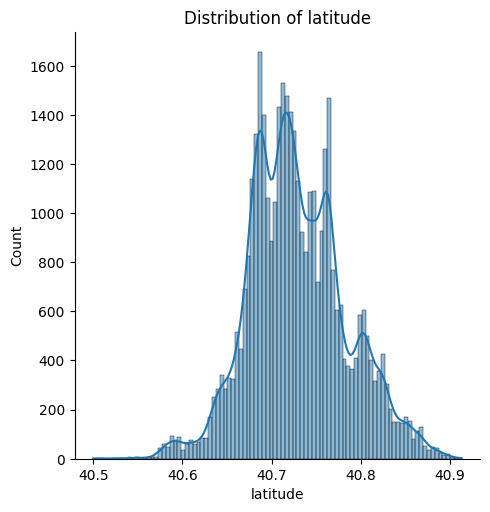

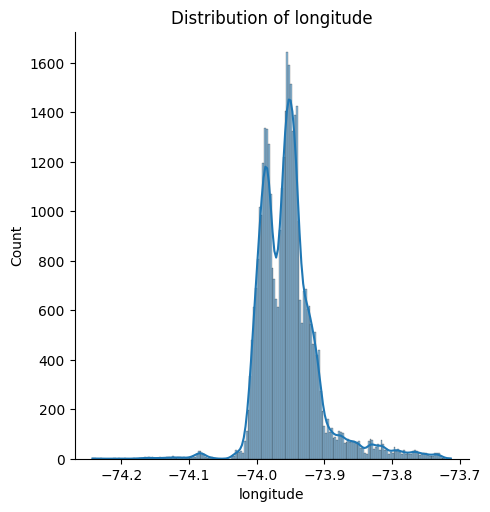

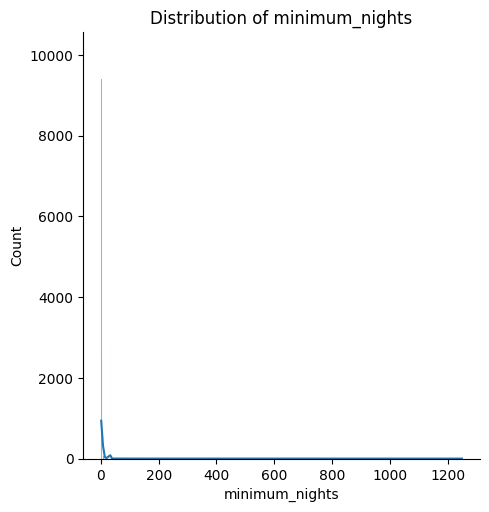

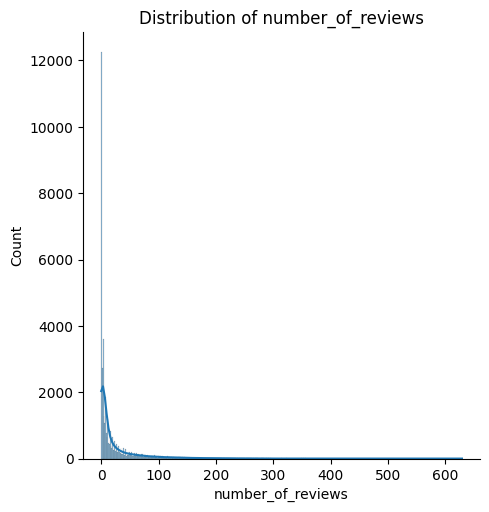

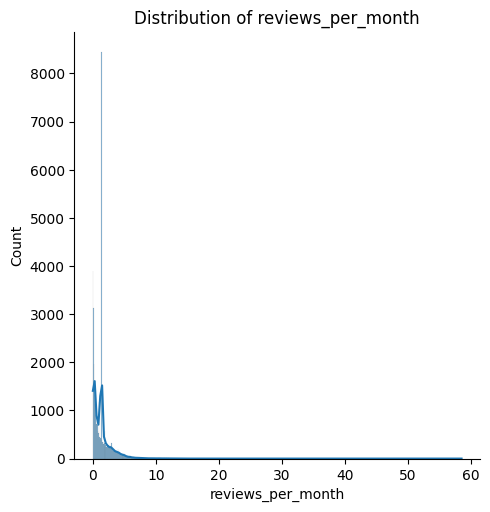

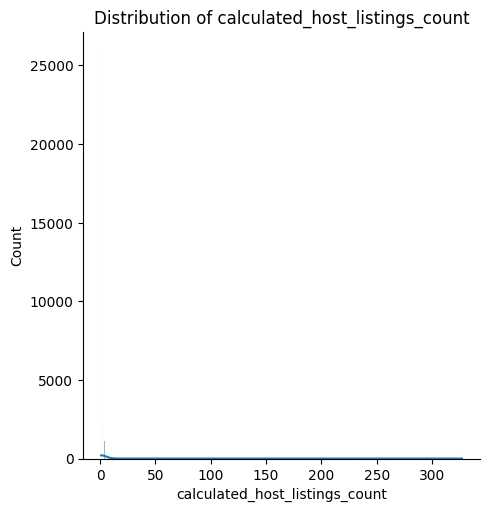

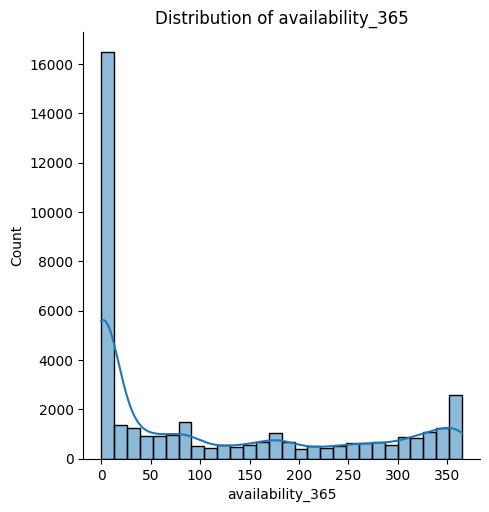

In [19]:
# Plot distributions for each predictor variable
for col in X_train.columns:
    sns.displot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


Remove Outliers and Check Effect on Final Predictive Model:

In [20]:
from scipy import stats
import numpy as np

# Removing outliers using Z-score (example for the 'price' column)
z = np.abs(stats.zscore(df['price']))
df_no_outliers = df[z < 3]

# Compare models with and without outliers
# You'll need to retrain your model on df_no_outliers and compare the performance with the original model


Remove 1%, 5%, and 10% of Data Randomly and Impute Values:

In [21]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # This line is required to enable IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Example for removing 1% of data from the 'price' column
df_with_missing = df.copy()
df_with_missing.loc[df_with_missing.sample(frac=0.01, random_state=42).index, 'price'] = np.nan

# Impute using different methods
# a. Simple Imputer (Mean)
imputer_mean = SimpleImputer(strategy='mean')
df_imputed_mean = imputer_mean.fit_transform(df_with_missing[['price']])

# b. KNN Imputer
imputer_knn = KNNImputer(n_neighbors=5)
df_imputed_knn = imputer_knn.fit_transform(df_with_missing[['price']])

# c. Iterative Imputer
imputer_iterative = IterativeImputer()
df_imputed_iterative = imputer_iterative.fit_transform(df_with_missing[['price']])

# Prepare for comparison
original_price = df['price']
imputed_mean_price = df_imputed_mean.ravel()
imputed_knn_price = df_imputed_knn.ravel()
imputed_iterative_price = df_imputed_iterative.ravel()

# You can now compare these arrays to the original 'price' data
# For instance, you can calculate the mean squared error for each method